# **Prediction of Housing Prices using Regression Models**




**Software used :** Google Colab 

**Dataset :** Boston Housing Prices



---
## **Loading the Dataset**


**Importing Needed Libraries**

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model,metrics

**Boston Housing Prices**

In [357]:
boston = datasets.load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

**Dataset Description**

In [358]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Dataset Features**

In [359]:
X = pd.DataFrame(boston.data,columns = boston.feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


**Dataset Target**

In [360]:
Y = pd.DataFrame(boston.target,columns = ['PRICE'])
Y

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## **Splitting the Dataset**

In [361]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)



---


## **Linear Regression**

**Linear Graph**

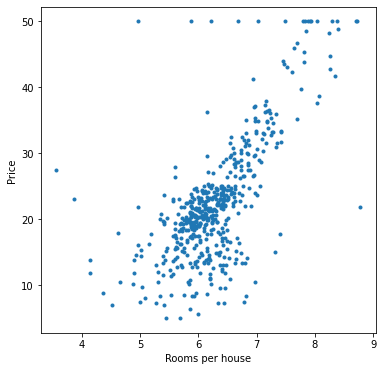

In [362]:
plt.figure(figsize=(6,6))
plt.ylabel('Price')
plt.xlabel('Rooms per house')
plt.plot(X['RM'],Y['PRICE'],'.')

**Training the model**

In [363]:
regr = linear_model.LinearRegression()
regr.fit(np.asanyarray(X_train[['RM']]),np.asanyarray(Y_train[['PRICE']]))

LinearRegression()

**Prediction**

In [364]:
pred = regr.predict(np.asarray(X_test[['RM']]))
pd.DataFrame(pred,columns=['PRED'])

,PRED
0,27.378984
1,26.084437
2,20.449350
3,19.163264
4,14.797341
...,...
147,20.220901
148,25.483700
149,19.865535
150,30.374211


**Plotting our model**

Intercept =  [-30.57103241]
Coefficient =  [[8.46109164]]


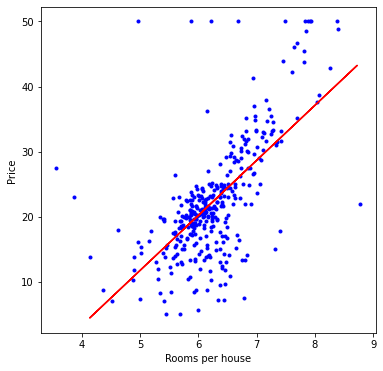

In [365]:
plt.figure(figsize=(6,6))
plt.ylabel('Price')
plt.xlabel('Rooms per house')
plt.plot(np.asanyarray(X_train[['RM']]),np.asanyarray(Y_train[['PRICE']]),'b.')
plt.plot(np.asanyarray(X_test[['RM']]),pred,'r')
print("Intercept = ",regr.intercept_)
print("Coefficient = ",regr.coef_)

**Model Accuracy**

In [366]:
print("MSE Score = ",np.mean((Y_test.values - pred)**2))
print("R2_Score = ",metrics.r2_score(Y_test,pred))

MSE Score =  36.517214730838624
R2_Score =  0.6015774471545622




---


## **Polynomial Regression**

**Polynomial Graph**

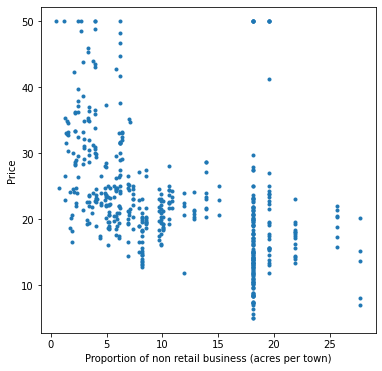

In [367]:
plt.figure(figsize=(6,6))
plt.ylabel('Price')
plt.xlabel('Proportion of non retail business (acres per town)')
plt.plot(X['INDUS'],Y['PRICE'],'.')

**Importing *PolynomialFeatures* for Polynomial Regression**

In [368]:
from sklearn.preprocessing import PolynomialFeatures

**Creating the model**

In [369]:
poly = PolynomialFeatures(degree=3)
poly_xtrain = poly.fit_transform(X_train[["INDUS"]])
poly_xtest = poly.transform(X_test[["INDUS"]])

**Training the model**

In [370]:
poly_reg = linear_model.LinearRegression()
poly_reg.fit(poly_xtrain,Y_train)

LinearRegression()

**Predictions**

In [371]:
pred = poly_reg.predict(poly_xtest) 
pd.DataFrame(pred,columns=["PRED"])

,PRED
0,32.005491
1,28.316206
2,23.108706
3,24.268642
4,18.227417
...,...
147,18.227417
148,30.274613
149,17.339606
150,27.927412


**Creating plots for plotting our model**

In [372]:
xplot = np.linspace(0,30,500)
yplot = poly_reg.intercept_[0] + xplot*poly_reg.coef_[0][1] + np.power(xplot,2)*poly_reg.coef_[0][2] + np.power(xplot,3)*poly_reg.coef_[0][3]

**Plotting our model**

Intercept =  [38.32963487]
Coefficient =  [[ 0.00000000e+00 -3.27012775e+00  1.76182116e-01 -3.14211512e-03]]


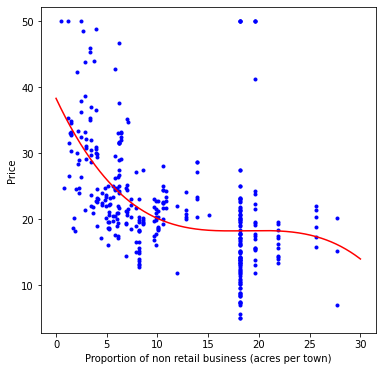

In [373]:
plt.figure(figsize=(6,6))
plt.ylabel('Price')
plt.xlabel('Proportion of non retail business (acres per town)')
plt.plot(np.asanyarray(X_train[['INDUS']]),np.asanyarray(Y_train[['PRICE']]),'b.')
plt.plot(xplot,yplot,'r')
print("Intercept = ",poly_reg.intercept_)
print("Coefficient = ",poly_reg.coef_)

**Model Accuracy**

In [374]:
print("MSE Score = ",np.mean((Y_test.values - pred)**2))
print("R2 Score = ",metrics.r2_score(Y_test,pred))

MSE Score =  69.07235015896099
R2 Score =  0.24638332128526996




---


## **Non-Linear Regression**

**Non-Linear Graph**

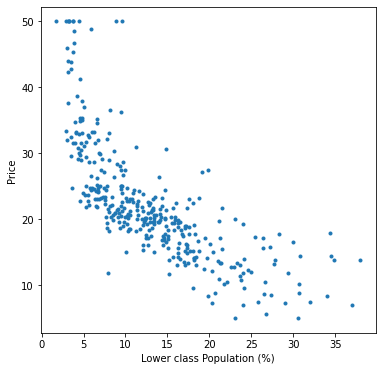

In [375]:
plt.figure(figsize=(6,6))
plt.ylabel('Price')
plt.xlabel('Lower class Population (%)')
plt.plot(np.asanyarray(X_train[['LSTAT']]),np.asanyarray(Y_train[['PRICE']]),'.')

**Importing *curve_fit* for setting the parameters of the equation of our desired model**

In [376]:
from scipy.optimize import curve_fit

**Equation of our model**

In [377]:
def equa(x,par1,par2):
  return par1*pow(x,par2)

**Receiving Parameters and Covariances**

In [378]:
popt,pcov = curve_fit(equa,X_train['LSTAT'].values,Y_train['PRICE'].values)
print("Parameters = ",popt)
print("Covariance = ",pcov)

Parameters =  [75.10713171 -0.52701093]
Covariance =  [[ 8.28335478e+00 -5.03850428e-02]
 [-5.03850428e-02  3.35712837e-04]]


**Predictions**

In [379]:
pred = equa(X_test["LSTAT"].values,*popt)
pd.DataFrame(pred,columns=['PRED'])

,PRED
0,25.917950
1,26.576283
2,16.002435
3,24.940183
4,22.098478
...,...
147,14.975999
148,27.672295
149,16.407056
150,22.816658


**Creating plot for plotting our model**

In [380]:
xplot = np.linspace(1,40,500)

**Plotting our model**

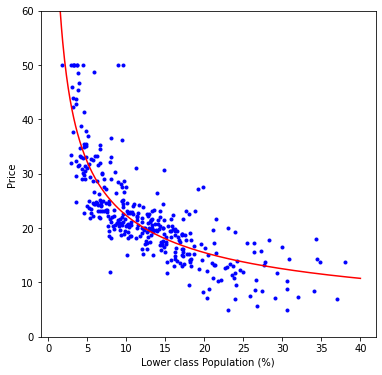

In [381]:
plt.figure(figsize=(6,6))
plt.ylabel('Price')
plt.xlabel('Lower class Population (%)')
plt.ylim(0,60)
plt.plot(np.asanyarray(X_train[['LSTAT']]),np.asanyarray(Y_train[['PRICE']]),'b.')
plt.plot(xplot,equa(xplot,*popt),'r')

**Model Accuracy**

In [382]:
print("MSE Score = ",np.mean((Y_test.values - pred)**2))
print("R2_Score = ",metrics.r2_score(Y_test,pred))

MSE Score =  154.596707158669
R2_Score =  0.6325054955352962




---


## **Multiple Regression**

**Training the model**

In [383]:
mul_reg = linear_model.LinearRegression()
mul_reg.fit(X_train,Y_train)

LinearRegression()

**Intercepts and Coefficients**

In [384]:
print("Intercept = ",mul_reg.intercept_)
print("Coefficient = ",mul_reg.coef_)

Intercept =  [46.39649387]
Coefficient =  [[-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
  -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
   3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
  -5.68834539e-01]]


**Predictions**

In [385]:
pred = mul_reg.predict(X_test) 
pd.DataFrame(pred,columns=["PRED"])

,PRED
0,32.391465
1,27.944013
2,17.837628
3,21.669414
4,18.936396
...,...
147,17.329959
148,28.360234
149,20.794228
150,33.698157


**Model Accuracy**

In [386]:
print("MSE Score = ",np.mean((Y_test.values - pred)**2))
print("R2_Score = ",metrics.r2_score(Y_test,pred))

MSE Score =  19.831323672063174
R2_Score =  0.7836295385076287




---


## **Result**

**Best MSE Score :** 19.8313

**Best R2 Score :** 0.7836

**Therefore, Best Model:** Multiple Regression



---


## **Conclusion**

Since the best R2 score and MSE score is obtained in Multiple Regression model, it should be the ideal model for the prediction of Housing Prices in Boston.